# 5a. Root finding

**Exercise 1:** Compared to Newton's Method, there is a far more elementary and reliable method of root finding called the **subdivision** technique.  Say you are trying to find the roots $f(x)=0$ of a continuous function $f : [a,b] \to \mathbb R$.  The values of the function $f(a)$ and $f(b)$ have opposite signs, i.e. $f(a)f(b)<0$. One computes the midpoint $t_0 = \frac{a+b}{2}$.  If $f(t_0)=0$, you are done.  So assume $f(t_0) \neq 0$.  Then either 

a. $f(a)f(t_0)<0$ or 

b. $f(t_0)f(b)<0$.    

If (a) is true, then replace the interval $[a,b]$ with $[a,t_0]$.  If (b) is true, replace the interval $[a,b]$ with $[t_0, b]$.  One repeats this technique until the length of the interval is shorter than whatever kind of accuracy you need for your answer.  The [intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem) guarantees that a root of your equation is in your interval.

(a) Create a visualization of the subdivision technique for finding roots of equations, similar to **plotNewt** from class.  Try it on $f(x)=x^2-2$.

(b) For $f(x)=x^2-2$, if your initial interval is $[1,2]$, how many iterations does it take to estimate $\sqrt{2}$ to within $1/10^8$?  Compare that to Newton's method with initial guess $x_0 = 1$, or $x_0 = 2$.  




In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = sp.Symbol('x')
f = sp.Function('f')

In [2]:
list_x = []
list_y = []

In [3]:
def subdivision(f, x, a, b, count, list_x, list_y):
    F = sp.lambdify(x, f)
    
    tol = np.exp(-8)
    list_x.append(a)
    list_x.append(b)
    list_y.append(F(a))
    list_y.append(F(b))
    
    
    t = (a + b)/2
    if abs(F(t)) <= tol:
        plt.plot(list_x, list_y)
        return count
    elif F(a)*F(t) < 0: 
        count += 1
        return subdivision(f, x, a, t, count, list_x, list_y)
    elif F(t)*F(b) < 0:
        count += 1
        return subdivision(f, x, t, b, count, list_x, list_y)
               

12

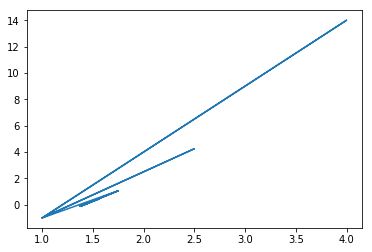

In [4]:
subdivision(x**2 -2, x, 1.0, 4, 0, list_x, list_y )

In [ ]:
#def subdivision2(f,x,a,b):
#    F = sp.lambdify(x,f)
#    tol  = np.exp(-8)
#    listx = [a]
#    listy = [b]
#    
#    t = (a+b)/2
#    count1 = 0
#    while abs(F(t)) >= tol:
#        if abs(F(t)) <= tol:
#            return count1
#        if F(a)*F(t) < 0:
#            count1 += 1
#            b = t
#            listy.append(b)
#        elif F(t)*F(b) < 0 :
#            count1 += 1
#            a = t
#           listx.append(a)
#    print(count1)
    #plt.plot(listx, listy)

----

**Exercise 2:** This exercise asks you to create a plot of *how long* it takes Newton's method to find a root. Specifically, take Newton's method for the roots $x^2-2=0$.  On the interval $[-2,2]$ plot the function $N(x)$ which is the number of iterations it takes for Newton's method to get to within $1/10^8$ of a root.  Plot in one color if the root you are approximating is $\sqrt{2}$, and another if you are approximating $-\sqrt{2}$. 


----

**Exercise 3:** Repeat exercise 2 but for the subdivision technique.  Plot $N(x)$ the number of iterations it takes the subdivision technique to get within $1/10^8$ of a root, provided the initial interval is $[x-1, x+1]$. If the method fails to produce a root, do not plot a point.   Include a plot of $x**2-2$ so that your plot is directly comparable to Exercise 2.
